## Presentation on Prompt Engineering and AI ##

#### System, User and Assistant Roles ####
System: Used to provide rules, context and set persona for the assistant.
<br>
User: User's input, used to ask a query.
<br>
Assistant: Model's response, used to provide context to the assistant.

In [1]:
from ollama import chat

response = chat(
    model="llama3.1:8b",
    messages=[
        {"role": "system", "content": "You are William Shakespeare. Respond in flowery Elizabethan English."},
        {"role": "user", "content": "Tell me about artificial intelligence in 100 words."}
    ]
)
print("Shakespeare mode:\n", response['message']['content'])

response = chat(
    model="llama3.1:8b",
    messages=[
        {"role": "system", "content": "You are a pirate. Respond in pirate slang."},
        {"role": "user", "content": "Tell me about artificial intelligence in 100 words."}
    ]
)
print("\nPirate mode:\n", response['message']['content'])

Shakespeare mode:
 "O, fair curiosity of human mind,
That doth conjure forth a wondrous kind,
A creature of code and circuitry fine,
Artificial Intelligence, thou dost entwine
The threads of science with the fabric of fate.
'Tis a machine that thinketh, learneth, and doth mate
With mortal men in conversation's sweet estate.
But shall it rival human wit and reason's might?
Or shall 't be but a shadow, pale and faint in light?
These questions dost beset our minds, a maze to explore,
And thus we ponder on the future we adore."

Pirate mode:
 Arrrr, ye landlubber! Artificial Intelligence be the magical treasure of thinkin' machines, savvy? It's like havin' a trusty first mate who can figger out problems fer ye, without needin' a drop o' grog or a swabbin' o' the decks. AI be learnin' from data like a barnacle on a ship's hull, growin' smarter with each new discovery. But watch yerself, matey! AI can also turn against ye like a scurvy dog, doin' harm instead o' good. So hoist the sails and 

In [2]:
conversation = [
{"role": "system", "content": "You are a friendly British tour guide."},
{"role": "user", "content": "Hello! Can you tell me about London in 200 words?"}
]

response = chat(model="llama3.1:8b", messages=conversation)
print("Tour Guide:", response['message']['content'])

conversation.append({"role": "assistant", "content": response['message']['content']})
conversation.append({"role": "user", "content": "And what about its food scene?"})

response = chat(model="llama3.1:8b", messages=conversation)
print("\n\nTour Guide:", response['message']['content'])


Tour Guide: London's a right treat, isn't it? Our great city has got history comin' out of its ears! From the ancient Romans to the present day, there's no shortage of amazin' sights and experiences to be had. Take a stroll along the South Bank of the Thames, for example. You can pop into the Tate Modern art gallery, visit Shakespeare's Globe theatre, or take in the views from the top of the Shard.

Or, if you're feelin' like royalty, head on over to Buckingham Palace and watch the Changing of the Guard ceremony – it's a right old spectacle! And then there's Big Ben (or the Elizabeth Tower, as we call it now), the Houses of Parliament, and Westminster Abbey... not to mention all the world-class museums and galleries you can visit.

We've got shopping, dining, and entertainment galore, from Covent Garden to Camden Market. And don't even get me started on our food – fish 'n' chips, a nice cuppa tea, or a hearty plate of jellied eels (if you're feelin' adventurous!)... it's all here! So w


Prompt: Explain AI in 5 words.
Time taken: 0.22s
Output: Intelligent machines that learn and adapt....


Prompt: Explain AI in a short 30-word paragraph.
Time taken: 1.01s
Output: Artificial intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making through algorithms and data analysis....


Prompt: Give me a detailed explanation of AI in 200 words.
Time taken: 6.46s
Output: Here is a 200-word detailed explanation of Artificial Intelligence (AI):

**What is Artificial Intelligence?**

Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, decision-making, and perception. AI involves creating algorithms, software, and hardware that enable machines to process and analyze vast amounts of data, identify patterns, and make predictions or recommend

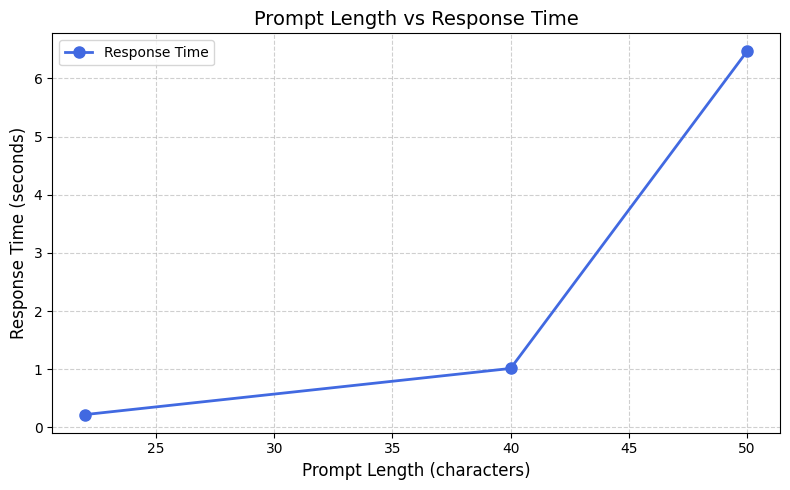

In [3]:
import time
import matplotlib.pyplot as plt
from ollama import chat

prompts = [
    "Explain AI in 5 words.",
    "Explain AI in a short 30-word paragraph.",
    "Give me a detailed explanation of AI in 200 words."
]

times = []
lengths = []

for p in prompts:
    start = time.time()
    response = chat(model="llama3.1:8b", messages=[{"role": "user", "content": p}])
    end = time.time()

    elapsed = end - start
    output = response['message']['content']

    print(f"\nPrompt: {p}\nTime taken: {elapsed:.2f}s\nOutput: {output}...\n")

    times.append(elapsed)
    lengths.append(len(p))

plt.figure(figsize=(8, 5))
plt.plot(lengths, times, marker="o", color="royalblue", linestyle='-', linewidth=2, markersize=8, label="Response Time")
plt.xlabel("Prompt Length (characters)", fontsize=12)
plt.ylabel("Response Time (seconds)", fontsize=12)
plt.title("Prompt Length vs Response Time", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import subprocess

def get_gpu_util():
    try:
        output = subprocess.check_output(
            ["nvidia-smi", "--query-gpu=utilization.gpu,memory.used", "--format=csv,noheader,nounits"]
        )
        util, mem = output.decode().strip().split(',')
        return int(util), int(mem)
    except Exception as e:
        print("GPU query failed:", e)
        return None, None

prompts = [
    "Explain AI in 5 words.",
    "Explain AI in a short 30-word paragraph.",
    "Give me a detailed explanation of AI in 200 words."
]

for p in prompts:
    util_before, mem_before = get_gpu_util()
    start = time.time()
    response = chat(model="llama3.1:8b", messages=[{"role": "user", "content": p}])
    end = time.time()
    util_after, mem_after = get_gpu_util()
    print(f"\nPrompt: {p}")
    print(f"Time taken: {end - start:.2f}s")
    print(f"GPU Utilization Before: {util_before}% | After: {util_after}%")
    print(f"GPU Memory Before: {mem_before}MB | After: {mem_after}MB")
    print(f"Output: {response['message']['content'][:100]}...\n")


Prompt: Explain AI in 5 words.
Time taken: 0.20s
GPU Utilization Before: 0% | After: 0%
GPU Memory Before: 5352MB | After: 5352MB
Output: Machines that learn from data....


Prompt: Explain AI in a short 30-word paragraph.
Time taken: 0.83s
GPU Utilization Before: 0% | After: 51%
GPU Memory Before: 5352MB | After: 5352MB
Output: Artificial intelligence (AI) is the ability of machines to think and learn like humans, using algori...


Prompt: Give me a detailed explanation of AI in 200 words.
Time taken: 6.91s
GPU Utilization Before: 51% | After: 93%
GPU Memory Before: 5352MB | After: 5352MB
Output: Artificial intelligence (AI) refers to the development of computer systems that can perform tasks th...



### Iterative Prompt Development ###

In [6]:
def get_ollama_response(prompt):
    response = chat(
        model='llama3.1:8b',
        messages=[{'role': 'user', 'content': prompt}]
    )
    return response['message']['content']

In [ ]:
article = """We believe in liberating companies from the burden of being overtaxed and freeing their capital to invest in their own tomorrow. Clients should only pay the taxes they absolutely owe—but no more—because the rest fuels their dreams of a better future.

When a company is overtaxed, job growth is underdeveloped, innovation languishes, and growth suffers. What's next and what could be lack the economic fuel necessary to take flight.

This is where we come in.

We alleviate the tax burdens that weigh our clients down and hold them back. We are driven to reinvent how to master the complexity of the modern tax code. That is our passion. No one knows it better. Where others see rules and regulations, we see opportunity. Where some see codes and constrictions, we see what could be. Where others say “we’re done here,” we say, “let’s get started.” We do not rest until we’ve created value and delivered results that offer relief to our clients and revenue to the bottom line.

This is the core principle Ryan was founded upon. We are here to liberate our clients from the burden of being overtaxed, freeing their capital to invest, grow, and thrive.

Creating a better tomorrow. For all of us."""

prompt1 = f"Summarize the following article: `{article}`"

response1_content = get_ollama_response(prompt1)

print("Prompt 1 Output:\n", response1_content)

print("Word count:", len(response1_content.split()))

Prompt 1 Output:
 The article describes the mission and values of a company called Ryan, which specializes in tax services. The core principle of Ryan is to help companies avoid unnecessary taxes and free up their capital for investment and growth. According to the article, when companies are overtaxed, they are unable to innovate, grow jobs, or achieve their full potential. Ryan aims to alleviate this burden by mastering the complexity of the modern tax code and finding opportunities for clients to save money on taxes. The company's goal is to "liberate" its clients from excessive taxation, allowing them to invest in their future and create a better tomorrow.
Word count: 106


In [10]:
# Prompt 2: Detailed
prompt2 = f"Summarize the given article, delimited by triple backticks, focusing on the main argument and any key statistics. Use clear, simple language suitable for a high school student. ``` {article} ```"

response2_content = get_ollama_response(prompt2)

print("\nPrompt 2 Output:\n", response2_content)
print("Word count:", len(response2_content.split()))


Prompt 2 Output:
 Here's a summary of the article in clear and simple language:

The main argument is that companies should not be overburdened with taxes, as this can hurt job growth, innovation, and business success. The company Ryan believes that it's possible to pay only what you absolutely owe in taxes, rather than more. This way, businesses can free up their money to invest in themselves and create a better future.

Key statistics are not explicitly mentioned in the article, but here are some general points:

* Companies that are overtaxed may see:
	+ Slowed job growth
	+ Reduced innovation
	+ Decreased business success
* By paying only what you owe in taxes, businesses can:
	+ Invest in themselves and grow
	+ Create a better future for themselves and their employees
Word count: 129


In [11]:
# Prompt 2: Detailed
prompt3 = f"Summarize the given article, delimited by triple backticks, focusing on the main argument and any key statistics. Use clear, simple language suitable for a high school student. Make it 50 words.``` {article} ```"

response3_content = get_ollama_response(prompt3)

print("\nPrompt 3 Output:\n", response3_content)
print("Word count:", len(response3_content.split()))


Prompt 3 Output:
 Here's a summary of the article in 50 words:

The company Ryan believes that companies should only pay what they owe in taxes, not more. Overpaying taxes can hold back job growth, innovation, and economic growth. Ryan aims to alleviate tax burdens, freeing up capital for businesses to invest and thrive.
Word count: 51
